In [51]:
import matplotlib.pyplot as plt
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches

### Auxiliary functions

In [52]:
def general_plot(files, tag_column_idx, colors, xidx, yidx, ylabel, xlabel, title, order, 
                 fontsize=20, font='serif', figsize=(15, 10), bottom=0, top=20):
    """
    Plot results of the wandb dataframes given a xcolumn index and a ycolumn index
    """
    
    plt.rcParams["font.family"] = font
    plt.rcParams["font.size"] = fontsize
    patches = []
    fig, axs = plt.subplots(figsize=figsize)

    for idx, file in enumerate(files):
        df = pd.read_csv(file)
        label = df.columns[tag_column_idx].split('_')[0]
        axs.plot(df.iloc[:, xidx], df.iloc[:, yidx], color=colors[idx], label=label)
        if label.strip()!='L=0':
            axs.scatter(df.iloc[:, xidx], df.iloc[:, yidx], color=colors[idx], marker='D')
        patch = mpatches.Patch(color=colors[idx], label=label)
        patches.append(patch)

    axs.set_xlabel(xlabel)
    axs.set_ylabel(ylabel)
    axs.set_ylim(bottom, top)
    handles, labels = axs.get_legend_handles_labels()
    plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
    plt.savefig(title)

In [53]:
def create_dict(files_list):
    """
    For each dataframe on the files_list, get the value on column 1
    for the last trained epoch.
    """
    values = dict()
    for file in files_list:
        df = pd.read_csv(file)
        value = df.iloc[-1, 1]
        column = df.columns[1]
        values[column] = value
    return values

In [54]:
def associate_right_value(L_order, current_dict, tags):
    right_value = dict()
    
    for l, tag in zip(L_order, tags):
        right_value[str(l)] = current_dict[tag]
    
    return right_value

In [55]:
def get_mean_std(path, size):
    files = glob.glob(path)
    array = np.array([])
    for file in files:
        new_array = pd.read_csv(file).iloc[:, 1].values.reshape(1, size)
        if len(array) == 0:
            array = new_array
        else:
            array = np.concatenate((array, new_array), axis=0)
    
    return np.mean(array, axis=0), np.std(array, axis=0)

In [56]:
def plot_sgd_against_entropy(sgd_mean, sgd_std, entropy_mean, entropy_std,
                             sgd_label, entropy_label, xlabel, ylabel,
                             sgd_epochs, langevin,
                             fontsize=20, font='serif', figsize=(15, 10), bottom=0, top=20):
    
    plt.rcParams["font.family"] = font
    plt.rcParams["font.size"] = fontsize
    patches = []

    fig, axs = plt.subplots(figsize=figsize)

    axs.plot(np.arange(1, sgd_epochs + 1), sgd_mean, 'black')
    axs.fill_between(np.arange(1, sgd_epochs + 1),
                        sgd_mean - sgd_std,
                        sgd_mean + sgd_std,
                        color='black',
                        alpha=0.3)
    patch = mpatches.Patch(color='black', label=sgd_label)
    patches.append(patch)

    axs.plot(np.arange(langevin, sgd_epochs + langevin, langevin), entropy_mean, 'red')
    axs.scatter(np.arange(langevin, sgd_epochs + langevin, langevin), entropy_mean, color='red', s=30)
    axs.fill_between(np.arange(langevin, sgd_epochs + langevin, langevin),
                        entropy_mean - entropy_std,
                        entropy_mean + entropy_std,
                        color='red',
                        alpha=0.3)
    patch = mpatches.Patch(color='red', label=entropy_label)
    patches.append(patch)
    axs.legend(handles=patches)

    axs.set_xlabel(xlabel)
    axs.set_ylabel(ylabel)
    axs.set_ylim(bottom, top)

### Time analysis

In [57]:
times = sorted(glob.glob('../WANDB_RESULTS/HyperParamAnalysis/g=3/time/**'))

In [58]:
for file in times:
    df = pd.read_csv(file)
    print(f'Experiment {df.columns[1]} took {np.sum(df.iloc[:, 1])}')

Experiment L=200_B=1_g=3_lr=0.1 - time/training_time took 2006739.875
Experiment L=100_B=2_g=3_lr=0.1 - time/training_time took 2067036.5625
Experiment L=50_B=4_g=3_lr=0.1 - time/training_time took 2193928.0
Experiment L=40_B=5_g=3_lr=0.1 - time/training_time took 2050692.15625
Experiment L=20_B=10_g=3_lr=0.1 - time/training_time took 2107303.578125
Experiment L=10_B=20_g=3_lr=0.1 - time/training_time took 2203829.78125
Experiment L=0_B=200_g=3_lr=0.1 - time/training_time took 1925645.0078125


### Last epoch calculus

In [59]:
errors = sorted(glob.glob('../WANDB_RESULTS/HyperParamAnalysis/g=3e-5/test_error/**'))

In [60]:
for file in errors:
    df = pd.read_csv(file)
    print(f'Experiment {df.columns[1]} had error = {np.round(df.iloc[-1, 1], 4)} % at epoch {df.iloc[-1, 0]}.')

Experiment L=200_B=1_g=3e-5_lr=0.1 - general/percentage_errors_test had error = 10.13 % at epoch 200.
Experiment L=100_B=2_g=3e-5_lr=0.1 - general/percentage_errors_test had error = 9.96 % at epoch 200.
Experiment L=50_B=4_g=3e-5_lr=0.1 - general/percentage_errors_test had error = 9.49 % at epoch 200.
Experiment L=40_B=5_g=3e-5_lr=0.1 - general/percentage_errors_test had error = 9.98 % at epoch 200.
Experiment L=20_B=10_g=3e-5_lr=0.1 - general/percentage_errors_test had error = 9.35 % at epoch 200.
Experiment L=10_B=20_g=3e-5_lr=0.1 - general/percentage_errors_test had error = 9.22 % at epoch 200.
Experiment L=0_B=200_g=3e-5_lr=0.1 - general/percentage_errors_test had error = 9.54 % at epoch 200.


In [61]:
for file in errors:
    df = pd.read_csv(file)
    print(f'Experiment {df.columns[1]} had minimum error = {np.round(np.min(df.iloc[:, 1]), 4)}.')

Experiment L=200_B=1_g=3e-5_lr=0.1 - general/percentage_errors_test had minimum error = 10.13.
Experiment L=100_B=2_g=3e-5_lr=0.1 - general/percentage_errors_test had minimum error = 9.87.
Experiment L=50_B=4_g=3e-5_lr=0.1 - general/percentage_errors_test had minimum error = 9.49.
Experiment L=40_B=5_g=3e-5_lr=0.1 - general/percentage_errors_test had minimum error = 9.81.
Experiment L=20_B=10_g=3e-5_lr=0.1 - general/percentage_errors_test had minimum error = 9.35.
Experiment L=10_B=20_g=3e-5_lr=0.1 - general/percentage_errors_test had minimum error = 9.19.
Experiment L=0_B=200_g=3e-5_lr=0.1 - general/percentage_errors_test had minimum error = 9.13.


In [62]:
errors = sorted(glob.glob('../WANDB_RESULTS/HyperParamAnalysis/g=3e-4/test_error/**'))

In [63]:
for file in errors:
    df = pd.read_csv(file)
    print(f'Experiment {df.columns[1]} had error = {np.round(df.iloc[-1, 1], 4)} % at epoch {df.iloc[-1, 0]}.')

Experiment L=200_B=1_g=3e-4_lr=0.1 - general/percentage_errors_test had error = 9.9 % at epoch 200.
Experiment L=100_B=2_g=3e-4_lr=0.1 - general/percentage_errors_test had error = 9.66 % at epoch 200.
Experiment L=50_B=4_g=3e-4_lr=0.1 - general/percentage_errors_test had error = 9.78 % at epoch 200.
Experiment L=40_B=5_g=3e-4_lr=0 - general/percentage_errors_test had error = 9.52 % at epoch 200.
Experiment L=20_B=10_g=3e-4_lr=0.1 - general/percentage_errors_test had error = 9.67 % at epoch 200.
Experiment L=10_B=20_g=3e-4_lr=0.1 - general/percentage_errors_test had error = 9.67 % at epoch 200.
Experiment L=0_B=200_g=3e-4_lr=0.1 - general/percentage_errors_test had error = 9.21 % at epoch 200.


In [64]:
for file in errors:
    df = pd.read_csv(file)
    print(f'Experiment {df.columns[1]} had minimum error = {np.round(np.min(df.iloc[:, 1]), 4)}.')

Experiment L=200_B=1_g=3e-4_lr=0.1 - general/percentage_errors_test had minimum error = 9.9.
Experiment L=100_B=2_g=3e-4_lr=0.1 - general/percentage_errors_test had minimum error = 9.66.
Experiment L=50_B=4_g=3e-4_lr=0.1 - general/percentage_errors_test had minimum error = 9.62.
Experiment L=40_B=5_g=3e-4_lr=0 - general/percentage_errors_test had minimum error = 9.52.
Experiment L=20_B=10_g=3e-4_lr=0.1 - general/percentage_errors_test had minimum error = 9.39.
Experiment L=10_B=20_g=3e-4_lr=0.1 - general/percentage_errors_test had minimum error = 9.1.
Experiment L=0_B=200_g=3e-4_lr=0.1 - general/percentage_errors_test had minimum error = 8.91.


In [65]:
errors = sorted(glob.glob('../WANDB_RESULTS/HyperParamAnalysis/g=3e-3/test_error/**'))

In [66]:
for file in errors:
    df = pd.read_csv(file)
    print(f'Experiment {df.columns[1]} had error = {np.round(df.iloc[-1, 1], 4)} % at epoch {df.iloc[-1, 0]}.')

Experiment L=200_B=1_g=3e-3_lr=0.1 - general/percentage_errors_test had error = 9.93 % at epoch 200.
Experiment L=100_B=2_g=3e-3_lr=0.1 - general/percentage_errors_test had error = 9.76 % at epoch 200.
Experiment L=50_B=4_g=3e-3_lr=0.1 - general/percentage_errors_test had error = 9.67 % at epoch 200.
Experiment L=40_B=5_g=3e-3_lr=0.1 - general/percentage_errors_test had error = 10.11 % at epoch 200.
Experiment L=20_B=10_g=3e-3_lr=0.1 - general/percentage_errors_test had error = 9.56 % at epoch 200.
Experiment L=10_B=20_g=3e-3_lr=0.1 - general/percentage_errors_test had error = 9.61 % at epoch 200.
Experiment L=0_B=200_g=3e-3_lr=0.1 - general/percentage_errors_test had error = 9.48 % at epoch 200.


In [67]:
for file in errors:
    df = pd.read_csv(file)
    print(f'Experiment {df.columns[1]} had minimum error = {np.round(np.min(df.iloc[:, 1]), 4)}.')

Experiment L=200_B=1_g=3e-3_lr=0.1 - general/percentage_errors_test had minimum error = 9.93.
Experiment L=100_B=2_g=3e-3_lr=0.1 - general/percentage_errors_test had minimum error = 9.76.
Experiment L=50_B=4_g=3e-3_lr=0.1 - general/percentage_errors_test had minimum error = 9.61.
Experiment L=40_B=5_g=3e-3_lr=0.1 - general/percentage_errors_test had minimum error = 9.69.
Experiment L=20_B=10_g=3e-3_lr=0.1 - general/percentage_errors_test had minimum error = 9.56.
Experiment L=10_B=20_g=3e-3_lr=0.1 - general/percentage_errors_test had minimum error = 9.42.
Experiment L=0_B=200_g=3e-3_lr=0.1 - general/percentage_errors_test had minimum error = 9.08.


In [68]:
errors = sorted(glob.glob('../WANDB_RESULTS/HyperParamAnalysis/g=0.03/test_error/**'))

In [69]:
for file in errors:
    df = pd.read_csv(file)
    print(f'Experiment {df.columns[1]} had error = {np.round(df.iloc[-1, 1], 4)} % at epoch {df.iloc[-1, 0]}.')

Experiment L=200_B=1_g=3e-2_lr=0.1 - general/percentage_errors_test had error = 9.06 % at epoch 200.
Experiment L=100_B=2_g=3e-2_lr=0.1 - general/percentage_errors_test had error = 9.93 % at epoch 200.
Experiment L=50_B=4_g=3e-2_lr=0.1 - general/percentage_errors_test had error = 9.39 % at epoch 200.
Experiment L=40_B=5_g=3e-2_lr=0.1 - general/percentage_errors_test had error = 9.77 % at epoch 200.
Experiment L=20_B=10_g=3e-2_lr=0.1 - general/percentage_errors_test had error = 9.64 % at epoch 200.
Experiment L=10_B=20_g=3e-2_lr=0.1 - general/percentage_errors_test had error = 9.11 % at epoch 200.
Experiment L=0_B=200_g=3e-2_lr=0.1 - general/percentage_errors_test had error = 9.18 % at epoch 200.


In [70]:
for file in errors:
    df = pd.read_csv(file)
    print(f'Experiment {df.columns[1]} had minimum error = {np.round(np.min(df.iloc[:, 1]), 4)}.')

Experiment L=200_B=1_g=3e-2_lr=0.1 - general/percentage_errors_test had minimum error = 9.06.
Experiment L=100_B=2_g=3e-2_lr=0.1 - general/percentage_errors_test had minimum error = 9.74.
Experiment L=50_B=4_g=3e-2_lr=0.1 - general/percentage_errors_test had minimum error = 9.39.
Experiment L=40_B=5_g=3e-2_lr=0.1 - general/percentage_errors_test had minimum error = 9.42.
Experiment L=20_B=10_g=3e-2_lr=0.1 - general/percentage_errors_test had minimum error = 9.64.
Experiment L=10_B=20_g=3e-2_lr=0.1 - general/percentage_errors_test had minimum error = 9.11.
Experiment L=0_B=200_g=3e-2_lr=0.1 - general/percentage_errors_test had minimum error = 8.95.


In [71]:
errors = sorted(glob.glob('../WANDB_RESULTS/HyperParamAnalysis/g=0.3/test_error/**'))

In [72]:
for file in errors:
    df = pd.read_csv(file)
    print(f'Experiment {df.columns[1]} had error = {np.round(df.iloc[-1, 1], 4)} % at epoch {df.iloc[-1, 0]}.')

Experiment L=200_B=1_g=0.3_lr=0.1 - general/percentage_errors_test had error = 10.19 % at epoch 200.
Experiment L=100_B=2_g=0.3_lr=0.1 - general/percentage_errors_test had error = 10.01 % at epoch 200.
Experiment L=50_B=4_g=0.3_lr=0.1 - general/percentage_errors_test had error = 9.66 % at epoch 200.
Experiment L=40_B=5_g=0.3_lr=0.1 - general/percentage_errors_test had error = 9.81 % at epoch 200.
Experiment L=20_B=10_g=0.3_lr=0.1 - general/percentage_errors_test had error = 9.3 % at epoch 200.
Experiment L=10_B=20_g=0.3_lr=0.1 - general/percentage_errors_test had error = 9.75 % at epoch 200.
Experiment L=0_B=200_g=0.3_lr=0.1 - general/percentage_errors_test had error = 9.14 % at epoch 200.


In [73]:
for file in errors:
    df = pd.read_csv(file)
    print(f'Experiment {df.columns[1]} had minimum error = {np.round(np.min(df.iloc[:, 1]), 4)}.')

Experiment L=200_B=1_g=0.3_lr=0.1 - general/percentage_errors_test had minimum error = 10.19.
Experiment L=100_B=2_g=0.3_lr=0.1 - general/percentage_errors_test had minimum error = 10.01.
Experiment L=50_B=4_g=0.3_lr=0.1 - general/percentage_errors_test had minimum error = 9.65.
Experiment L=40_B=5_g=0.3_lr=0.1 - general/percentage_errors_test had minimum error = 9.81.
Experiment L=20_B=10_g=0.3_lr=0.1 - general/percentage_errors_test had minimum error = 9.3.
Experiment L=10_B=20_g=0.3_lr=0.1 - general/percentage_errors_test had minimum error = 9.4.
Experiment L=0_B=200_g=0.3_lr=0.1 - general/percentage_errors_test had minimum error = 8.97.


In [74]:
errors = sorted(glob.glob('../WANDB_RESULTS/HyperParamAnalysis/g=3/test_error/**'))

In [75]:
for file in errors:
    df = pd.read_csv(file)
    print(f'Experiment {df.columns[1]} had error = {np.round(df.iloc[-1, 1], 4)} % at epoch {df.iloc[-1, 0]}.')

Experiment L=200_B=1_g=3_lr=0.1 - general/percentage_errors_test had error = 12.21 % at epoch 200.
Experiment L=100_B=2_g=3_lr=0.1 - general/percentage_errors_test had error = 10.66 % at epoch 200.
Experiment L=50_B=4_g=3_lr=0.1 - general/percentage_errors_test had error = 9.76 % at epoch 200.
Experiment L=40_B=5_g=3_lr=0.1 - general/percentage_errors_test had error = 9.59 % at epoch 200.
Experiment L=20_B=10_g=3_lr=0.1 - general/percentage_errors_test had error = 9.31 % at epoch 200.
Experiment L=10_B=20_g=3_lr=0.1 - general/percentage_errors_test had error = 9.63 % at epoch 200.
Experiment L=0_B=200_g=3_lr=0.1 - general/percentage_errors_test had error = 9.43 % at epoch 200.


In [76]:
for file in errors:
    df = pd.read_csv(file)
    print(f'Experiment {df.columns[1]} had minimum error = {np.round(np.min(df.iloc[:, 1]), 4)}.')

Experiment L=200_B=1_g=3_lr=0.1 - general/percentage_errors_test had minimum error = 12.21.
Experiment L=100_B=2_g=3_lr=0.1 - general/percentage_errors_test had minimum error = 10.66.
Experiment L=50_B=4_g=3_lr=0.1 - general/percentage_errors_test had minimum error = 9.76.
Experiment L=40_B=5_g=3_lr=0.1 - general/percentage_errors_test had minimum error = 9.59.
Experiment L=20_B=10_g=3_lr=0.1 - general/percentage_errors_test had minimum error = 9.21.
Experiment L=10_B=20_g=3_lr=0.1 - general/percentage_errors_test had minimum error = 9.42.
Experiment L=0_B=200_g=3_lr=0.1 - general/percentage_errors_test had minimum error = 9.3.


### L variation - pattern analysis of the test error

For each variation of L, a fixed gamma is considered

In [77]:
test_errors_1 = sorted(glob.glob('../WANDB_RESULTS/HyperParamAnalysis/g=3e-5/test_error/**'))

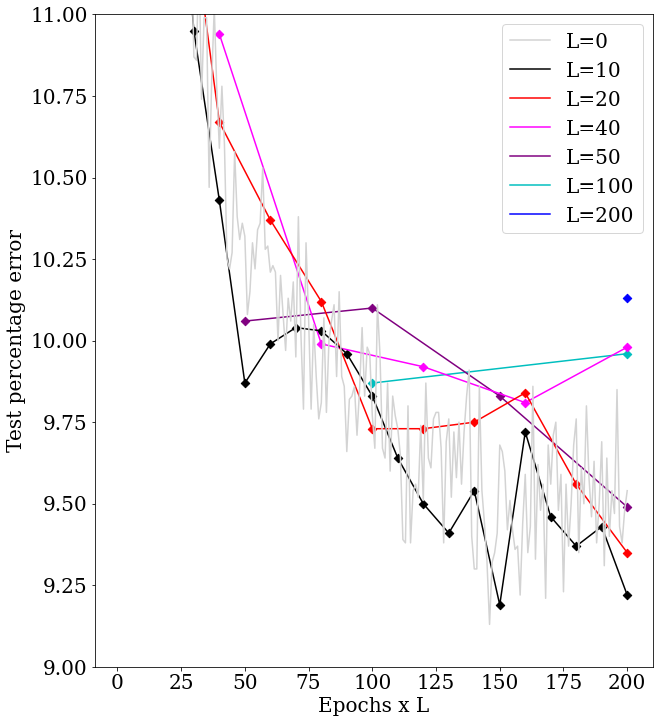

In [78]:
general_plot(test_errors_1,
             1, 
             ['blue', 'c', 'purple', 'magenta', 'red', 'black', 'lightgrey'], 
             0,
             1,
             'Test percentage error',
             'Epochs x L', 
             'gamma_3e-5_test_errors',
             [6, 5, 4, 3, 2, 1, 0],
             fontsize=20, font='serif', figsize=(10, 12), bottom=9, top=11)

In [79]:
test_errors_2 = sorted(glob.glob('../WANDB_RESULTS/HyperParamAnalysis/g=3e-4/test_error/**'))

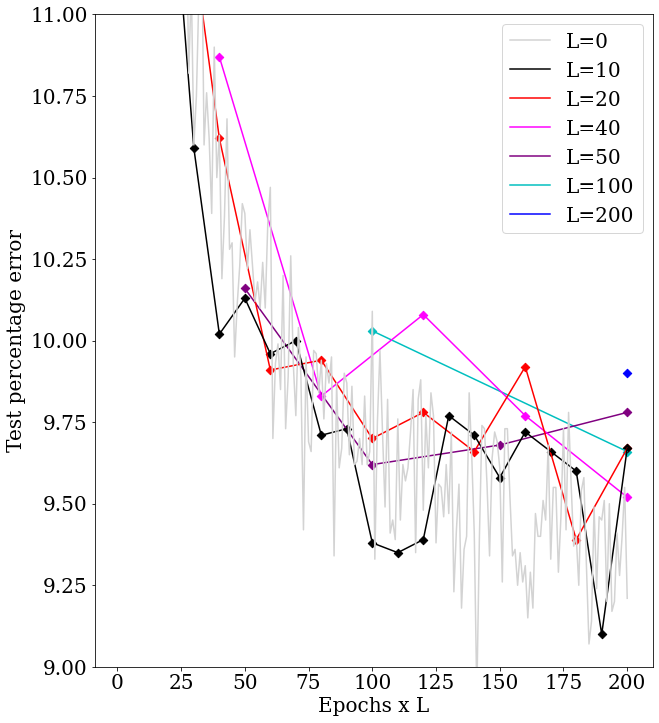

In [80]:
general_plot(test_errors_2,
             1, 
             ['blue', 'c', 'purple', 'magenta', 'red', 'black', 'lightgrey'], 
             0,
             1,
             'Test percentage error',
             'Epochs x L', 
             'gamma_3e-4_test_errors',
             [6, 5, 4, 3, 2, 1, 0],
             fontsize=20, font='serif', figsize=(10, 12), bottom=9, top=11)

In [81]:
test_errors_3 = sorted(glob.glob('../WANDB_RESULTS/HyperParamAnalysis/g=3e-3/test_error/**'))

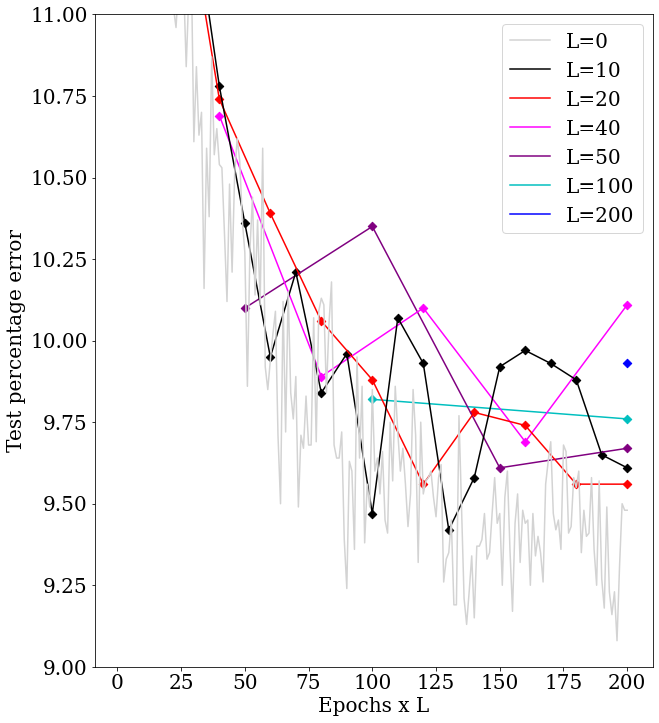

In [82]:
general_plot(test_errors_3,
             1, 
             ['blue', 'c', 'purple', 'magenta', 'red', 'black', 'lightgrey'], 
             0,
             1,
             'Test percentage error',
             'Epochs x L', 
             'gamma_3e-3_test_errors',
             [6, 5, 4, 3, 2, 1, 0],
             fontsize=20, font='serif', figsize=(10, 12), bottom=9, top=11)

In [83]:
test_errors_4 = sorted(glob.glob('../WANDB_RESULTS/HyperParamAnalysis/g=0.03/test_error/**'))

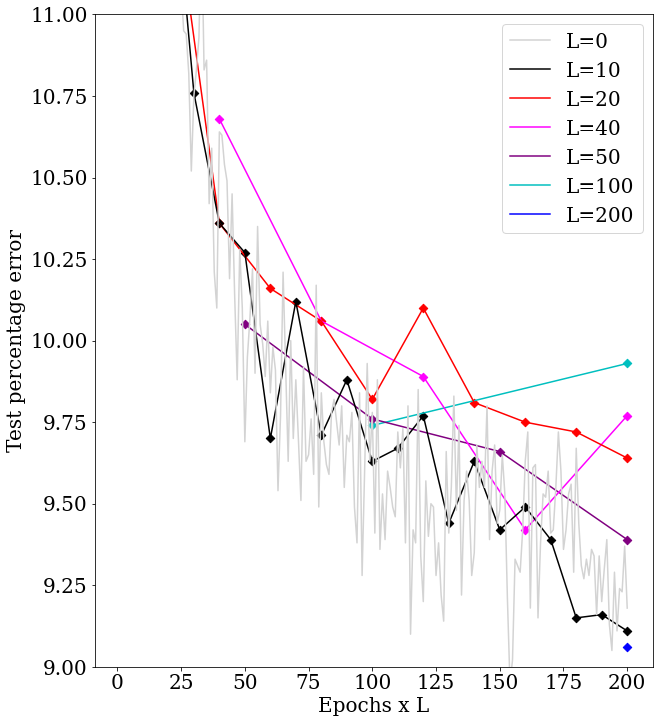

In [84]:
general_plot(test_errors_4,
             1, 
             ['blue', 'c', 'purple', 'magenta', 'red', 'black', 'lightgrey'], 
             0,
             1,
             'Test percentage error',
             'Epochs x L', 
             'gamma_3e-2_test_errors',
             [6, 5, 4, 3, 2, 1, 0],
             fontsize=20, font='serif', figsize=(10, 12), bottom=9, top=11)

In [85]:
test_errors_5 = sorted(glob.glob('../WANDB_RESULTS/HyperParamAnalysis/g=0.3/test_error/**'))

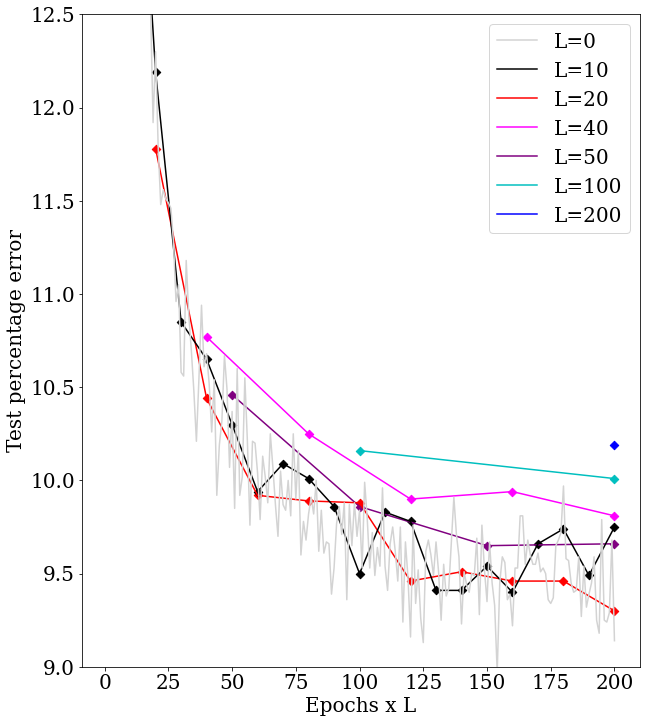

In [86]:
general_plot(test_errors_5,
             1, 
             ['blue', 'c', 'purple', 'magenta', 'red', 'black', 'lightgrey'], 
             0,
             1,
             'Test percentage error',
             'Epochs x L', 
             'gamma_3e-1_test_errors',
             [6, 5, 4, 3, 2, 1, 0],
             fontsize=20, font='serif', figsize=(10, 12), bottom=9, top=12.5)

In [87]:
test_errors_6 = sorted(glob.glob('../WANDB_RESULTS/HyperParamAnalysis/g=3/test_error/**'))

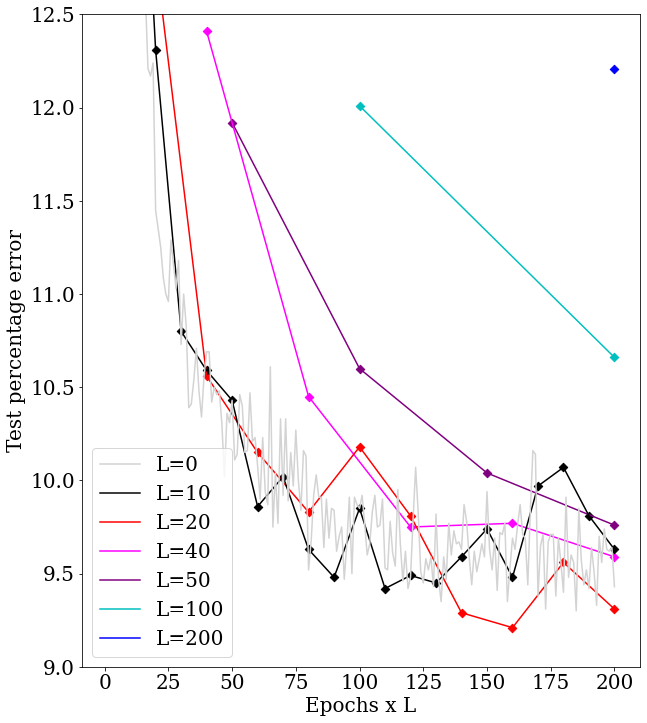

In [88]:
general_plot(test_errors_6,
             1, 
             ['blue', 'c', 'purple', 'magenta', 'red', 'black', 'lightgrey'], 
             0,
             1,
             'Test percentage error',
             'Epochs x L', 
             'gamma_3_test_errors',
             [6, 5, 4, 3, 2, 1, 0],
             fontsize=20, font='serif', figsize=(10, 12), bottom=9, top=12.5)

### L variation - pattern analysis of the Cross Entropy Loss

For each variation of L, a fixed gamma is considered

In [89]:
train_loss_1 = sorted(glob.glob('../WANDB_RESULTS/HyperParamAnalysis/g=3e-5/train_loss/**'))

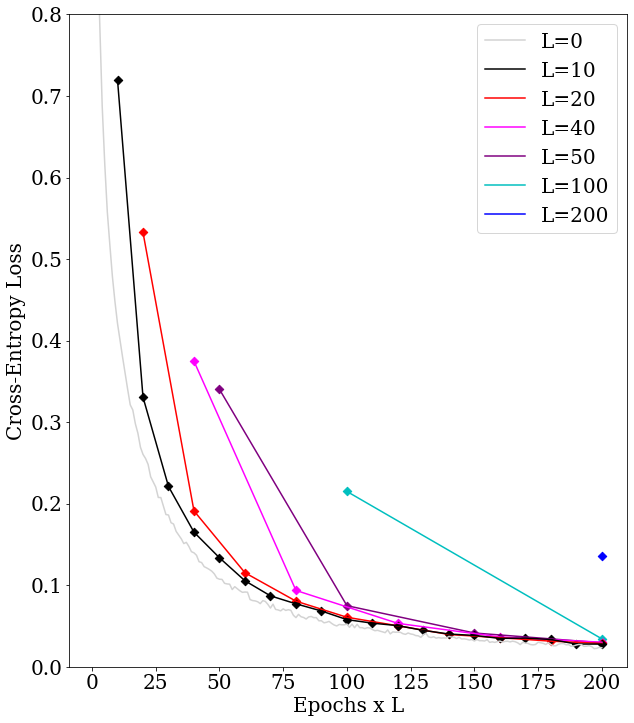

In [90]:
general_plot(train_loss_1,
             1, 
             ['blue', 'c', 'purple', 'magenta', 'red', 'black', 'lightgrey'], 
             0,
             1,
             'Cross-Entropy Loss',
             'Epochs x L', 
             'gamma_3e-5_loss',
             [6, 5, 4, 3, 2, 1, 0],
             fontsize=20, font='serif', figsize=(10, 12), bottom=0, top=0.8)

For each variation of L, a fixed gamma is considered

In [91]:
train_loss_2 = sorted(glob.glob('../WANDB_RESULTS/HyperParamAnalysis/g=3e-4/train_loss/**'))

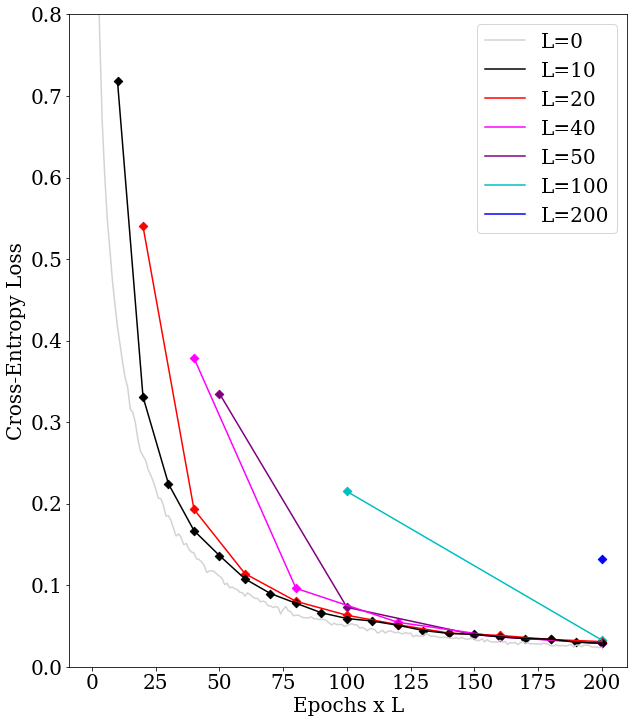

In [92]:
general_plot(train_loss_2,
             1, 
             ['blue', 'c', 'purple', 'magenta', 'red', 'black', 'lightgrey'], 
             0,
             1,
             'Cross-Entropy Loss',
             'Epochs x L', 
             'gamma_3e-4_loss',
             [6, 5, 4, 3, 2, 1, 0],
             fontsize=20, font='serif', figsize=(10, 12), bottom=0, top=0.8)

For each variation of L, a fixed gamma is considered

In [93]:
train_loss_3 = sorted(glob.glob('../WANDB_RESULTS/HyperParamAnalysis/g=3e-3/train_loss/**'))

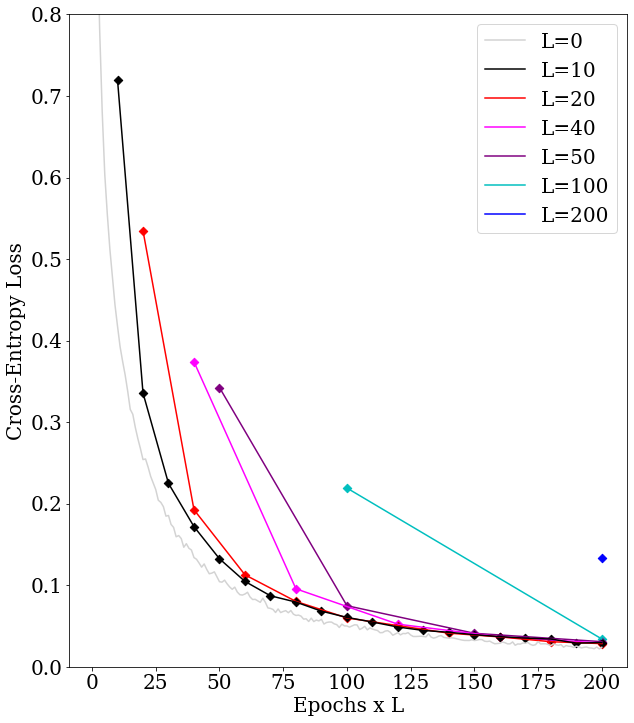

In [94]:
general_plot(train_loss_3,
             1, 
             ['blue', 'c', 'purple', 'magenta', 'red', 'black', 'lightgrey'], 
             0,
             1,
             'Cross-Entropy Loss',
             'Epochs x L', 
             'gamma_3e-3_loss',
             [6, 5, 4, 3, 2, 1, 0],
             fontsize=20, font='serif', figsize=(10, 12), bottom=0, top=0.8)

For each variation of L, a fixed gamma is considered

In [95]:
train_loss_4 = sorted(glob.glob('../WANDB_RESULTS/HyperParamAnalysis/g=0.03/train_loss/**'))

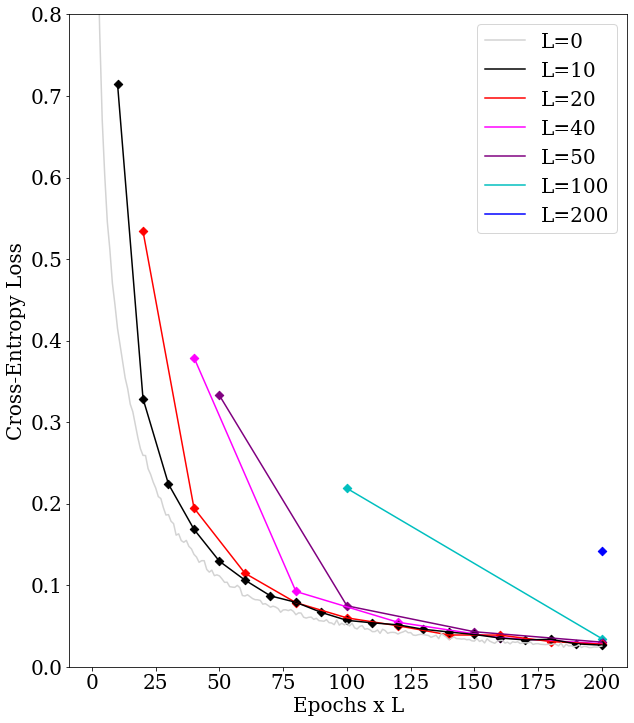

In [96]:
general_plot(train_loss_4,
             1, 
             ['blue', 'c', 'purple', 'magenta', 'red', 'black', 'lightgrey'], 
             0,
             1,
             'Cross-Entropy Loss',
             'Epochs x L', 
             'gamma_3e-2_loss',
             [6, 5, 4, 3, 2, 1, 0],
             fontsize=20, font='serif', figsize=(10, 12), bottom=0, top=0.8)

For each variation of L, a fixed gamma is considered

In [97]:
train_loss_5 = sorted(glob.glob('../WANDB_RESULTS/HyperParamAnalysis/g=0.3/train_loss/**'))

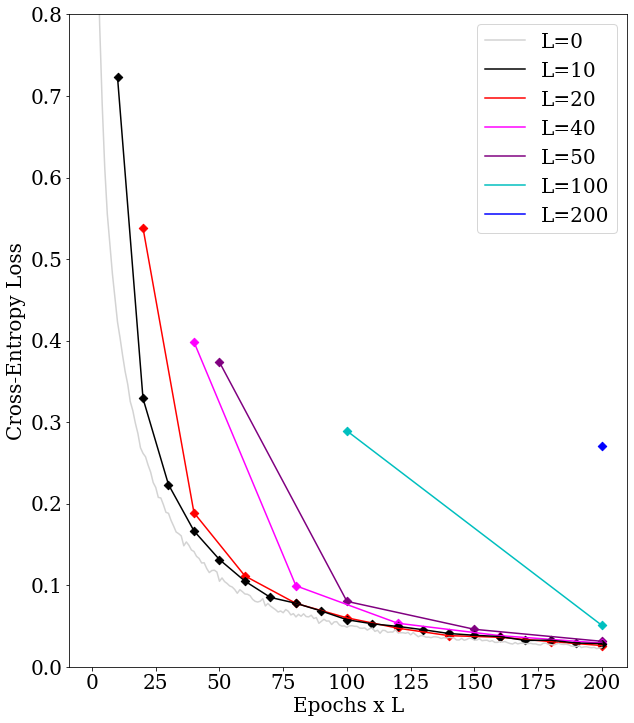

In [98]:
general_plot(train_loss_5,
             1, 
             ['blue', 'c', 'purple', 'magenta', 'red', 'black', 'lightgrey'], 
             0,
             1,
             'Cross-Entropy Loss',
             'Epochs x L', 
             'gamma_3e-1_loss',
             [6, 5, 4, 3, 2, 1, 0],
             fontsize=20, font='serif', figsize=(10, 12), bottom=0, top=0.8)

For each variation of L, a fixed gamma is considered

In [99]:
train_loss_6 = sorted(glob.glob('../WANDB_RESULTS/HyperParamAnalysis/g=3/train_loss/**'))

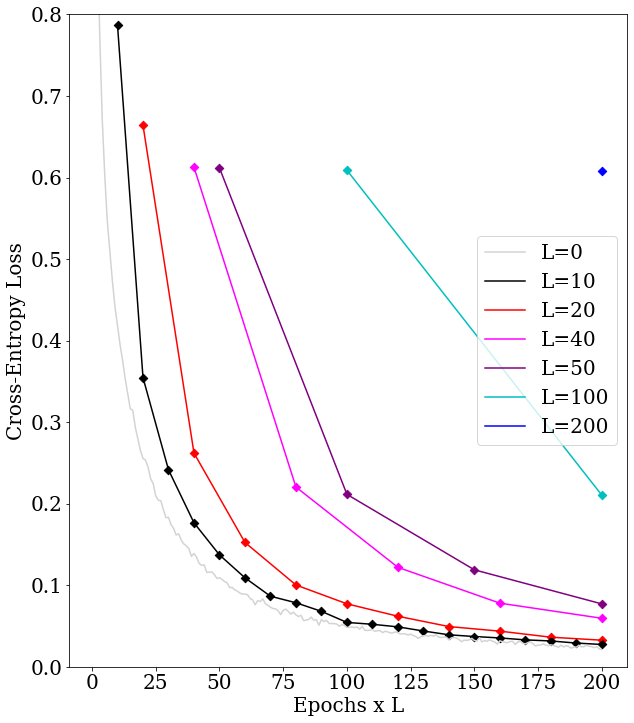

In [100]:
general_plot(train_loss_6,
             1, 
             ['blue', 'c', 'purple', 'magenta', 'red', 'black', 'lightgrey'], 
             0,
             1,
             'Cross-Entropy Loss',
             'Epochs x L', 
             'gamma_3_loss',
             [6, 5, 4, 3, 2, 1, 0],
             fontsize=20, font='serif', figsize=(10, 12), bottom=0, top=0.8)

## Legacy plots (TBD)

### Last epoch analysis 

### Gamma variation with scoping - pattern analysis of the test error: TBD

### L variation - Last epoch analysis

In [101]:
test_errors = glob.glob('../WANDB_RESULTS/Lvariation_seed51_gamma0.03_lrdecay/test_errors/**')
pacbayes_flatness = glob.glob('../WANDB_RESULTS/Lvariation_seed51_gamma0.03_lrdecay/pacbayes_flatness/**')
pacbayes_mag_flatness = glob.glob('../WANDB_RESULTS/Lvariation_seed51_gamma0.03_lrdecay/pacbayes_mag_flatness/**')

In [102]:
test_dict = create_dict(test_errors)
pb_f = create_dict(pacbayes_flatness)
pb_mf = create_dict(pacbayes_mag_flatness)

In [103]:
# Tags defined on WANDB
test_tags = ['SGD, s=51, lr_decay - percentage_errors/test',
             'Entropy SGD, L=5, s=51, gamma=0.03, lr_decay - percentage_errors/test',
             'Entropy SGD, L=10, s=51, gamma=0.03, lr_decay - percentage_errors/test',
             'Entropy SGD, L=20, s=51, gamma=0.03, lr_decay - percentage_errors/test',
             'Entropy SGD, L=25, s=51, gamma=0.03, lr_decay - percentage_errors/test']

pb_tags = ['SGD, s=51, lr_decay - complexity/PACBAYES_FLATNESS',
            'Entropy SGD, L=5, s=51, gamma=0.03, lr_decay - complexity/PACBAYES_FLATNESS',
            'Entropy SGD, L=10, s=51, gamma=0.03, lr_decay - complexity/PACBAYES_FLATNESS',
            'Entropy SGD, L=20, s=51, gamma=0.03, lr_decay - complexity/PACBAYES_FLATNESS',
            'Entropy SGD, L=25, s=51, gamma=0.03, lr_decay - complexity/PACBAYES_FLATNESS']

pb_mf_tags = ['SGD, s=51, lr_decay - complexity/PACBAYES_MAG_FLATNESS',
              'Entropy SGD, L=5, s=51, gamma=0.03, lr_decay - complexity/PACBAYES_MAG_FLATNESS',
              'Entropy SGD, L=10, s=51, gamma=0.03, lr_decay - complexity/PACBAYES_MAG_FLATNESS',
              'Entropy SGD, L=20, s=51, gamma=0.03, lr_decay - complexity/PACBAYES_MAG_FLATNESS',
             'Entropy SGD, L=25, s=51, gamma=0.03, lr_decay - complexity/PACBAYES_MAG_FLATNESS']

# Current L variations on the order defined by the tags
L = [0, 5, 10, 20, 25]

test_values = associate_right_value(L, test_dict, test_tags)
pb_values = associate_right_value(L, pb_f, pb_tags)
pb_mf_values = associate_right_value(L, pb_mf, pb_mf_tags)

Text(0, 0.5, 'Test errors (%)')

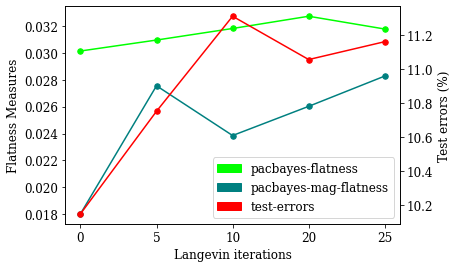

In [104]:
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = "12"
patches = []

fig, axs = plt.subplots()
axs.plot(pb_values.keys(), pb_values.values(), 'lime')
axs.scatter(pb_values.keys(), pb_values.values(), s=30, color='lime')
patch = mpatches.Patch(color='lime', label='pacbayes-flatness')
patches.append(patch)

axs.plot(pb_mf_values.keys(), pb_mf_values.values(), 'teal')
axs.scatter(pb_mf_values.keys(), pb_mf_values.values(), s=30, color='teal')
patch = mpatches.Patch(color='teal', label='pacbayes-mag-flatness')
patches.append(patch)

ax2 = axs.twinx()
ax2.plot(test_values.keys(), test_values.values(), 'red')
ax2.scatter(test_values.keys(), test_values.values(), s=30, color='red')
patch = mpatches.Patch(color='red', label='test-errors')
patches.append(patch)
plt.legend(handles=patches)

axs.set_xlabel('Langevin iterations')
axs.set_ylabel('Flatness Measures')
ax2.set_ylabel('Test errors (%)')

### Gamma variation - Last epoch analysis

In [105]:
test_errors = glob.glob('../WANDB_RESULTS/Gammavariation_seed51_L20_lrdecay/test_errors/**')
pacbayes_flatness = glob.glob('../WANDB_RESULTS/Gammavariation_seed51_L20_lrdecay/pacbayes_flatness/**')
pacbayes_mag_flatness = glob.glob('../WANDB_RESULTS/Gammavariation_seed51_L20_lrdecay/pacbayes_mag_flatness/**')

In [106]:
test_dict = create_dict(test_errors)
pb_f = create_dict(pacbayes_flatness)
pb_mf = create_dict(pacbayes_mag_flatness)

In [107]:
# Tags defined on WANDB
test_tags = ['Entropy SGD, L=20, s=51, gamma=3, lr_decay - percentage_errors/test',
            'Entropy SGD, L=20, s=51, gamma=0.3, lr_decay - percentage_errors/test',
            'Entropy SGD, L=20, s=51, gamma=0.03, lr_decay - percentage_errors/test',
            'Entropy SGD, L=20, s=51, gamma=0.003, lr_decay - percentage_errors/test',
            'Entropy SGD, L=20, s=51, gamma=0.0003, lr_decay - percentage_errors/test',
            'Entropy SGD, L=20, s=51, gamma=0.00003, lr_decay - percentage_errors/test']

pb_tags = ['Entropy SGD, L=20, s=51, gamma=3, lr_decay - complexity/PACBAYES_FLATNESS',
          'Entropy SGD, L=20, s=51, gamma=0.3, lr_decay - complexity/PACBAYES_FLATNESS',
          'Entropy SGD, L=20, s=51, gamma=0.03, lr_decay - complexity/PACBAYES_FLATNESS',
          'Entropy SGD, L=20, s=51, gamma=0.003, lr_decay - complexity/PACBAYES_FLATNESS',
          'Entropy SGD, L=20, s=51, gamma=0.0003, lr_decay - complexity/PACBAYES_FLATNESS',
          'Entropy SGD, L=20, s=51, gamma=0.00003, lr_decay - complexity/PACBAYES_FLATNESS']

pb_mf_tags = ['Entropy SGD, L=20, s=51, gamma=3, lr_decay - complexity/PACBAYES_MAG_FLATNESS',
             'Entropy SGD, L=20, s=51, gamma=0.3, lr_decay - complexity/PACBAYES_MAG_FLATNESS',
             'Entropy SGD, L=20, s=51, gamma=0.03, lr_decay - complexity/PACBAYES_MAG_FLATNESS',
             'Entropy SGD, L=20, s=51, gamma=0.003, lr_decay - complexity/PACBAYES_MAG_FLATNESS',
             'Entropy SGD, L=20, s=51, gamma=0.0003, lr_decay - complexity/PACBAYES_MAG_FLATNESS',
             'Entropy SGD, L=20, s=51, gamma=0.00003, lr_decay - complexity/PACBAYES_MAG_FLATNESS']

Gamma = ['3e-5', '3e-4', '3e-3', '3e-2', '3e-1', '3']

test_values = associate_right_value(Gamma, test_dict, list(reversed(test_tags)))
pb_values = associate_right_value(Gamma, pb_f, list(reversed(pb_tags)))
pb_mf_values = associate_right_value(Gamma, pb_mf, list(reversed(pb_mf_tags)))

Text(0, 0.5, 'Test errors (%)')

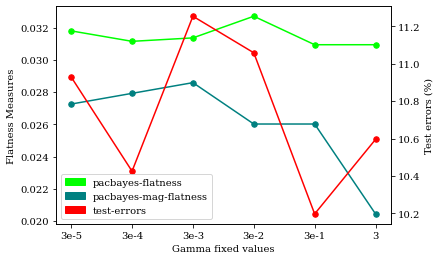

In [108]:
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = "10"
patches = []

fig, axs = plt.subplots()
axs.plot(pb_values.keys(), pb_values.values(), 'lime')
axs.scatter(pb_values.keys(), pb_values.values(), s=30, color='lime')
patch = mpatches.Patch(color='lime', label='pacbayes-flatness')
patches.append(patch)

axs.plot(pb_mf_values.keys(), pb_mf_values.values(), 'teal')
axs.scatter(pb_mf_values.keys(), pb_mf_values.values(), s=30, color='teal')
patch = mpatches.Patch(color='teal', label='pacbayes-mag-flatness')
patches.append(patch)

ax2 = axs.twinx()
ax2.plot(test_values.keys(), test_values.values(), 'red')
ax2.scatter(test_values.keys(), test_values.values(), s=30, color='red')
patch = mpatches.Patch(color='red', label='test-errors')
patches.append(patch)
plt.legend(handles=patches)

axs.set_xlabel('Gamma fixed values')
axs.set_ylabel('Flatness Measures')
ax2.set_ylabel('Test errors (%)')

### Scoping analysis

In [109]:
test_errors = glob.glob('../WANDB_RESULTS/Gammavariation_seed51_L20_lrdecay/test_errors/**')
pacbayes_flatness = glob.glob('../WANDB_RESULTS/Gammavariation_seed51_L20_lrdecay/pacbayes_flatness/**')
pacbayes_mag_flatness = glob.glob('../WANDB_RESULTS/Gammavariation_seed51_L20_lrdecay/pacbayes_mag_flatness/**')

scoping_test_errors = glob.glob('../WANDB_RESULTS/Gammavariation_seed51_L20_lrdecay_scoping/test_errors/**')
scoping_pacbayes_flatness = glob.glob('../WANDB_RESULTS/Gammavariation_seed51_L20_lrdecay_scoping/pacbayes_flatness/**')
scoping_pacbayes_mag_flatness = glob.glob('../WANDB_RESULTS/Gammavariation_seed51_L20_lrdecay_scoping/pacbayes_mag_flatness/**')

In [110]:
test_dict = create_dict(test_errors)
test_dict_scoping = create_dict(scoping_test_errors)
pb_f = create_dict(pacbayes_flatness)
pb_f_scoping = create_dict(scoping_pacbayes_flatness)

In [111]:
test = ['Entropy SGD, L=20, s=51, gamma=0.00003, lr_decay - percentage_errors/test',
        'Entropy SGD, L=20, s=51, gamma=0.0003, lr_decay - percentage_errors/test',
        'Entropy SGD, L=20, s=51, gamma=0.003, lr_decay - percentage_errors/test',
        'Entropy SGD, L=20, s=51, gamma=0.03, lr_decay - percentage_errors/test']

test_scoping = ['Entropy SGD, L=20, s=51, gamma=0.00003, scoping, lr_decay - percentage_errors/test',
                'Entropy SGD, L=20, s=51, gamma=0.0003, lr_decay, scoping - percentage_errors/test',
                'Entropy SGD, L=20, s=51, gamma=0.003, scoping, lr_decay - percentage_errors/test',
                'Entropy SGD, L=20, s=51, gamma=0.03, scoping, lr_decay - percentage_errors/test']

pb_flatness = ['Entropy SGD, L=20, s=51, gamma=0.00003, lr_decay - complexity/PACBAYES_FLATNESS',
               'Entropy SGD, L=20, s=51, gamma=0.0003, lr_decay - complexity/PACBAYES_FLATNESS',
               'Entropy SGD, L=20, s=51, gamma=0.003, lr_decay - complexity/PACBAYES_FLATNESS',
               'Entropy SGD, L=20, s=51, gamma=0.03, lr_decay - complexity/PACBAYES_FLATNESS']
              

pb_flatness_scoping = ['Entropy SGD, L=20, s=51, gamma=0.00003, scoping, lr_decay - complexity/PACBAYES_FLATNESS',
                        'Entropy SGD, L=20, s=51, gamma=0.0003, lr_decay, scoping - complexity/PACBAYES_FLATNESS',
                        'Entropy SGD, L=20, s=51, gamma=0.003, scoping, lr_decay - complexity/PACBAYES_FLATNESS',
                        'Entropy SGD, L=20, s=51, gamma=0.03, scoping, lr_decay - complexity/PACBAYES_FLATNESS']

In [112]:
Gamma = ['3e-5', '3e-4', '3e-3', '3e-2']

test_values = associate_right_value(Gamma, test_dict, test)
test_values_scoping = associate_right_value(Gamma, test_dict_scoping, test_scoping)

pb_values = associate_right_value(Gamma, pb_f, pb_flatness)
scoping_pb_values = associate_right_value(Gamma, pb_f_scoping, pb_flatness_scoping)

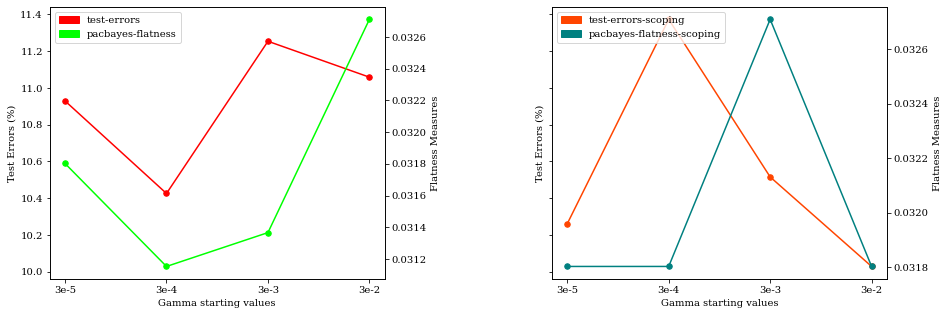

In [113]:
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = "10"
patches = []

fig, axs = plt.subplots(1, 2, figsize=(15, 5) , sharey=True)

axs[0].plot(test_values.keys(), test_values.values(), 'red')
axs[0].scatter(test_values.keys(), test_values.values(), s=30, color='red')
patch = mpatches.Patch(color='red', label='test-errors')
patches.append(patch)

ax2 = axs[0].twinx()
ax2.plot(pb_values.keys(), pb_values.values(), 'lime')
ax2.scatter(pb_values.keys(), pb_values.values(), s=30, color='lime')
patch = mpatches.Patch(color='lime', label='pacbayes-flatness')
patches.append(patch)

axs[0].set_xlabel('Gamma starting values')
axs[0].set_ylabel('Test Errors (%)')
ax2.set_ylabel('Flatness Measures')
plt.legend(handles=patches)

patches = []

axs[1].plot(test_values_scoping.keys(), test_values_scoping.values(), 'orangered')
axs[1].scatter(test_values_scoping.keys(), test_values_scoping.values(), s=30, color='orangered')
patch = mpatches.Patch(color='orangered', label='test-errors-scoping')
patches.append(patch)

ax2 = axs[1].twinx()
ax2.plot(scoping_pb_values.keys(), scoping_pb_values.values(), 'teal')
ax2.scatter(scoping_pb_values.keys(), scoping_pb_values.values(), s=30, color='teal')
patch = mpatches.Patch(color='teal', label='pacbayes-flatness-scoping')
patches.append(patch)
plt.legend(handles=patches)

axs[1].set_xlabel('Gamma starting values')
axs[1].set_ylabel('Test Errors (%)')
ax2.set_ylabel('Flatness Measures')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)

### LR decay analysis

In [114]:
test_errors_decay = glob.glob('../WANDB_RESULTS/Lvariation_seed51_gamma0.03_lrdecay/test_errors/**')
test_errors_nodecay = glob.glob('../WANDB_RESULTS/Lvariation_seed51_gamma0.03/test_errors/**')

In [115]:
test_tags = ['SGD, s=51, lr_decay - percentage_errors/test',
             'Entropy SGD, L=5, s=51, gamma=0.03, lr_decay - percentage_errors/test',
             'Entropy SGD, L=10, s=51, gamma=0.03, lr_decay - percentage_errors/test',
             'Entropy SGD, L=20, s=51, gamma=0.03, lr_decay - percentage_errors/test',
             'Entropy SGD, L=25, s=51, gamma=0.03, lr_decay - percentage_errors/test']

test_tags_nodecay = ['ENTROPY SGD, L=0,  SEED 51 - percentage_errors/test',
    'Entropy-SGD, L=5, E=40, SEED=51 - percentage_errors/test',
    'Entropy-SGD L=10, E=20, SEED=51 - percentage_errors/test',
    'Entropy SGD - L=20, E=10, SEED=51 - percentage_errors/test',
    'Entropy-SGD L=25, E=8, SEED=51 - percentage_errors/test']

L = [0, 5, 10, 20, 25]

test_dict = create_dict(test_errors_decay)
test_dict_no_decay = create_dict(test_errors_nodecay)
test_values = associate_right_value(L, test_dict, test_tags)
test_values_decay = associate_right_value(L, test_dict_no_decay, test_tags_nodecay)

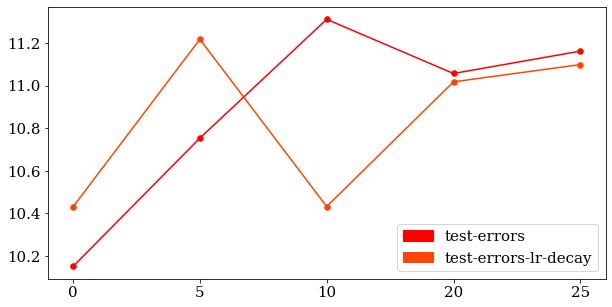

In [116]:
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = "15"
patches = []

fig, axs = plt.subplots(figsize=(10, 5))

axs.plot(test_values.keys(), test_values.values(), 'red')
axs.scatter(test_values.keys(), test_values.values(), s=30, color='red')
patch = mpatches.Patch(color='red', label='test-errors')
patches.append(patch)

axs.plot(test_values_decay.keys(), test_values_decay.values(), 'orangered')
axs.scatter(test_values_decay.keys(), test_values_decay.values(), s=30, color='orangered')
patch = mpatches.Patch(color='orangered', label='test-errors-lr-decay')
patches.append(patch)
plt.legend(handles=patches)

## Seeds analysis

### 1. Train and Test errors

In [117]:
sgd_mean, sgd_std = get_mean_std('../WANDB_RESULTS/Final_SGD_seeds/test_errors/**', 200)
entropy_mean, entropy_std = get_mean_std('../WANDB_RESULTS/Final_Entropy_seeds/test_errors/**', 10)

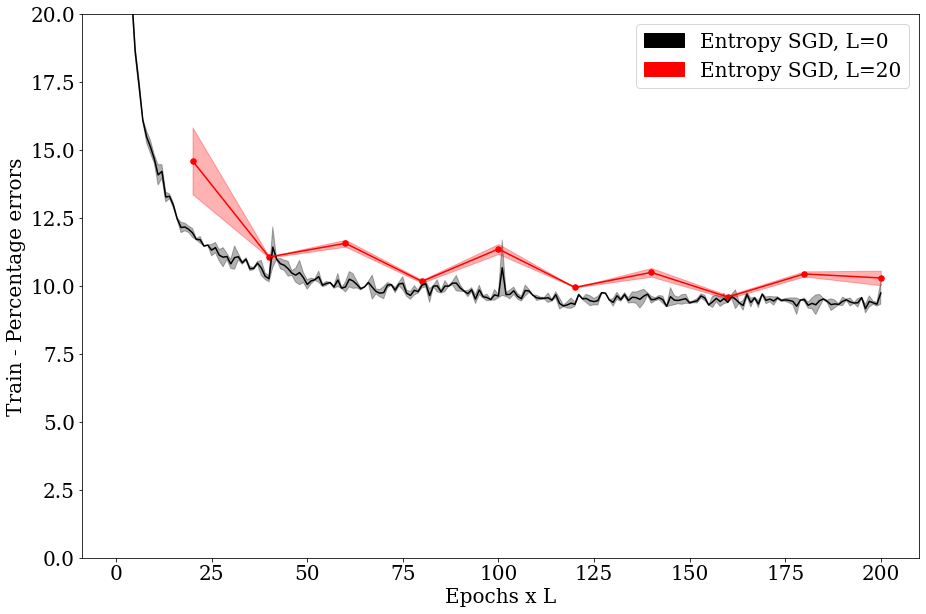

In [118]:
plot_sgd_against_entropy(sgd_mean,
                         sgd_std,
                         entropy_mean,
                         entropy_std,
                         'Entropy SGD, L=0',
                         'Entropy SGD, L=20', 
                         'Epochs x L',
                         'Train - Percentage errors',
                         200,
                         20)

In [119]:
sgd_mean, sgd_std = get_mean_std('../WANDB_RESULTS/Final_SGD_seeds/test_errors/**', 200)
entropy_mean, entropy_std = get_mean_std('../WANDB_RESULTS/Final_Entropy_seeds/test_errors/**', 10)

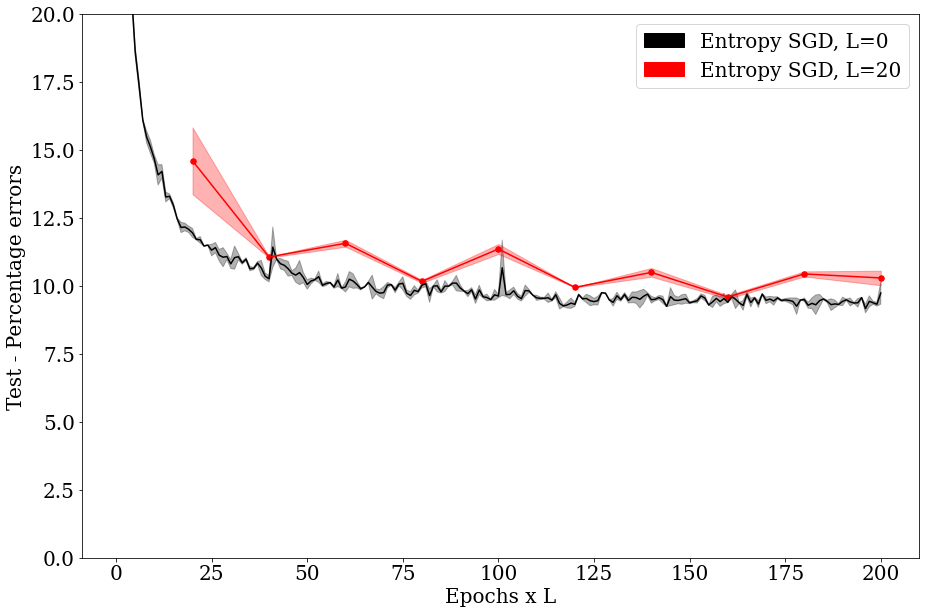

In [120]:
plot_sgd_against_entropy(sgd_mean,
                         sgd_std,
                         entropy_mean,
                         entropy_std,
                         'Entropy SGD, L=0',
                         'Entropy SGD, L=20', 
                         'Epochs x L',
                         'Test - Percentage errors',
                         200,
                         20)

###  2. Pacbayes Flatness and pacbayes mag flatness

In [121]:
sgd_mean, sgd_std = get_mean_std('../WANDB_RESULTS/Final_SGD_seeds/test_errors/**', 200)
entropy_mean, entropy_std = get_mean_std('../WANDB_RESULTS/Final_Entropy_seeds/test_errors/**', 10)

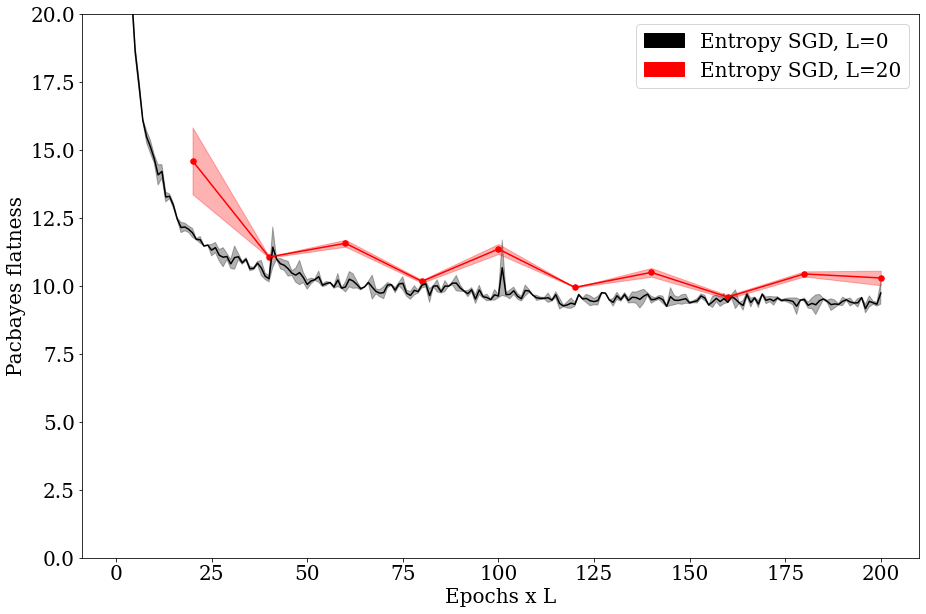

In [122]:
plot_sgd_against_entropy(sgd_mean,
                         sgd_std,
                         entropy_mean,
                         entropy_std,
                         'Entropy SGD, L=0',
                         'Entropy SGD, L=20', 
                         'Epochs x L',
                         'Pacbayes flatness',
                         200,
                         20)

In [123]:
sgd_mean, sgd_std = get_mean_std('../WANDB_RESULTS/Final_SGD_seeds/test_errors/**', 200)
entropy_mean, entropy_std = get_mean_std('../WANDB_RESULTS/Final_Entropy_seeds/test_errors/**', 10)

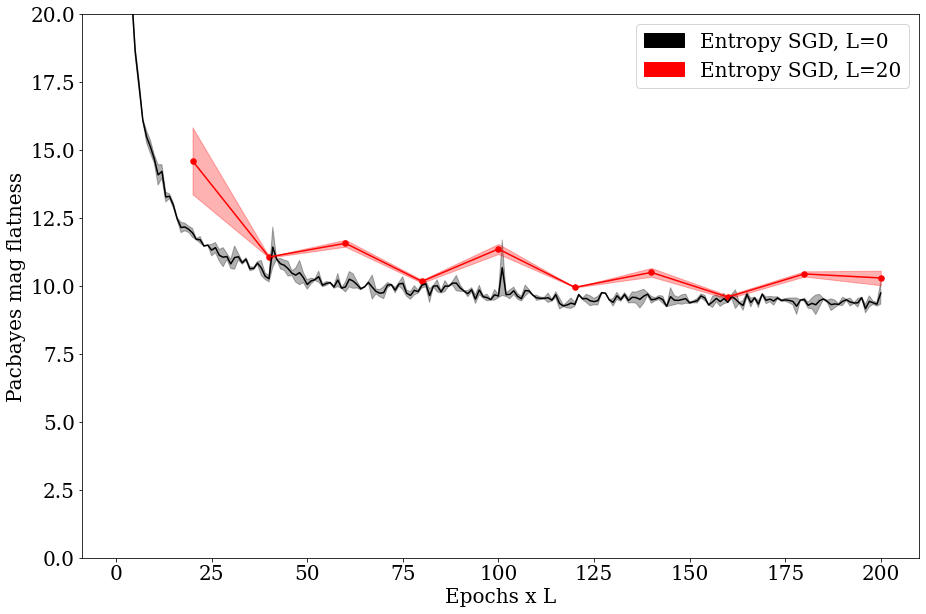

In [124]:
plot_sgd_against_entropy(sgd_mean,
                         sgd_std,
                         entropy_mean,
                         entropy_std,
                         'Entropy SGD, L=0',
                         'Entropy SGD, L=20', 
                         'Epochs x L',
                         'Pacbayes mag flatness',
                         200,
                         20)

### 3. Pacbayes init e pacbayes  mag init

In [125]:
sgd_mean, sgd_std = get_mean_std('../WANDB_RESULTS/Final_SGD_seeds/test_errors/**', 200)
entropy_mean, entropy_std = get_mean_std('../WANDB_RESULTS/Final_Entropy_seeds/test_errors/**', 10)

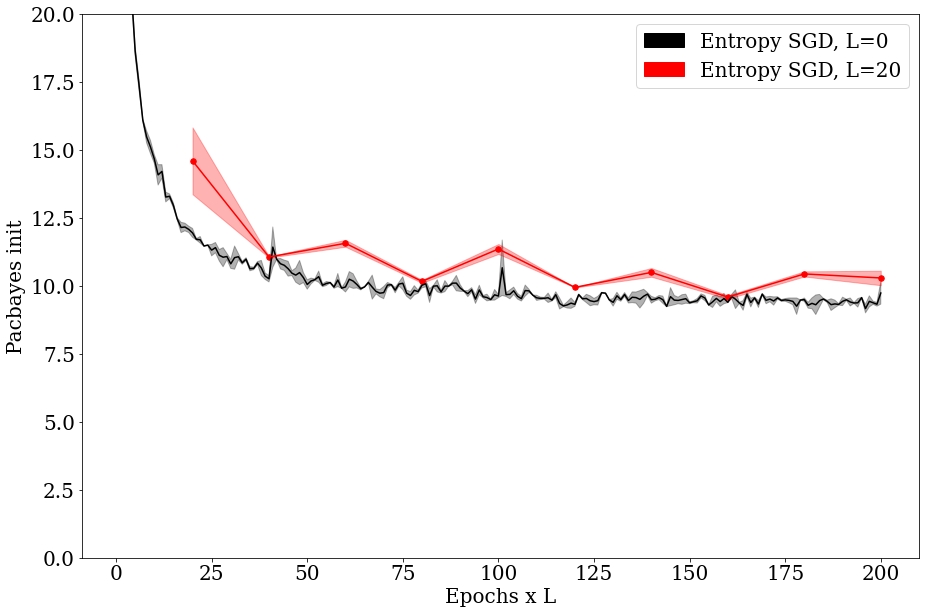

In [126]:
plot_sgd_against_entropy(sgd_mean,
                         sgd_std,
                         entropy_mean,
                         entropy_std,
                         'Entropy SGD, L=0',
                         'Entropy SGD, L=20', 
                         'Epochs x L',
                         'Pacbayes init',
                         200,
                         20)

In [127]:
sgd_mean, sgd_std = get_mean_std('../WANDB_RESULTS/Final_SGD_seeds/test_errors/**', 200)
entropy_mean, entropy_std = get_mean_std('../WANDB_RESULTS/Final_Entropy_seeds/test_errors/**', 10)

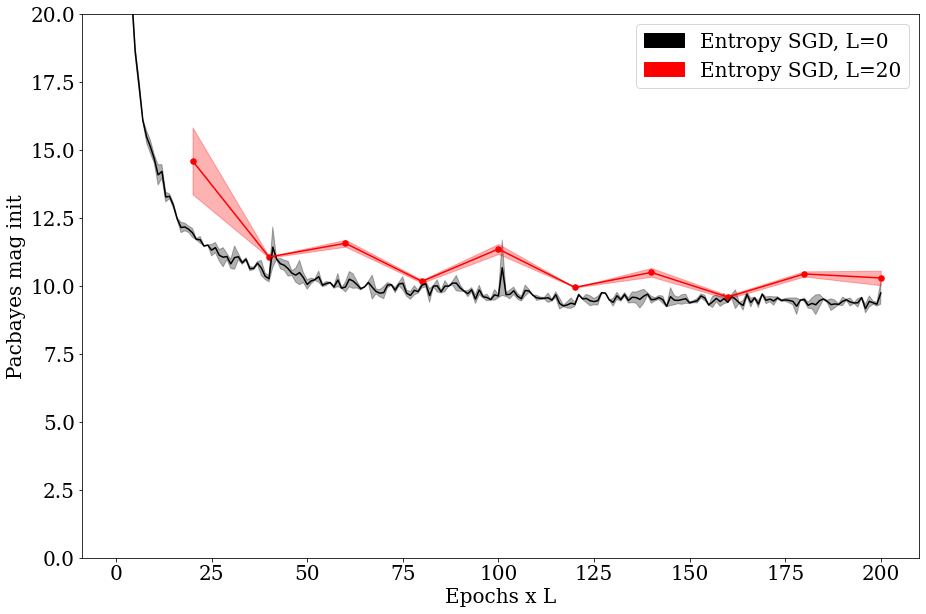

In [128]:
plot_sgd_against_entropy(sgd_mean,
                         sgd_std,
                         entropy_mean,
                         entropy_std,
                         'Entropy SGD, L=0',
                         'Entropy SGD, L=20', 
                         'Epochs x L',
                         'Pacbayes mag init',
                         200,
                         20)